# IMPORTS

In [109]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from pylab import *

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, LSTM, RepeatVector, Flatten,Dropout
from keras.layers import TimeDistributed
from sklearn.metrics import mean_squared_error

In [82]:
df = pd.read_csv("data.csv")

C:\Users\maxme\AppData\Local\Temp\ipykernel_34808\3477112522.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [83]:
need_col = ['Participant name','Presented Stimulus name','Recording start time','Recording resolution height','Recording resolution width','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)']

## selecting only the columns that I need

In [84]:
new_df = pd.DataFrame()
for col in need_col:
    new_df = pd.concat([new_df,df[col]],axis=1)


In [85]:
new_df

,Participant name,Presented Stimulus name,Recording start time,Recording resolution height,Recording resolution width,Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm)
0,Participant1,NaN,15:48:26.718,1080,1920,NaN,NaN,NaN,NaN
1,Participant1,NaN,15:48:26.718,1080,1920,NaN,NaN,NaN,NaN
2,Participant1,NaN,15:48:26.718,1080,1920,NaN,NaN,NaN,NaN
3,Participant1,NaN,15:48:26.718,1080,1920,NaN,NaN,NaN,NaN
4,Participant1,NaN,15:48:26.718,1080,1920,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
106211,Participant7,NaN,16:37:03.636,1080,1920,246.7,128.1,246.9,123.0
106212,Participant7,NaN,16:37:03.636,1080,1920,247.3,117.1,243.8,123.3
106213,Participant7,NaN,16:37:03.636,1080,1920,244.1,118.6,247.5,114.3
106214,Participant7,NaN,16:37:03.636,1080,1920,242.2,120.6,244.5,117.8


In [86]:
new_df['Presented Stimulus name'].value_counts()

Eyetracker Calibration    81785
Slide5                     7167
Slide1                     4136
Slide2                     3965
Slide4                     2934
Slide3                     2603
Slide6                     2539
Name: Presented Stimulus name, dtype: int64

## Choosing the needed slides

In [87]:
new_df = new_df.loc[(new_df['Presented Stimulus name']=='Slide4')| (new_df['Presented Stimulus name']=='Slide5')]

In [88]:
new_df.isna().sum()

Participant name                  0
Presented Stimulus name           0
Recording start time              0
Recording resolution height       0
Recording resolution width        0
Gaze point left X (DACSmm)     2133
Gaze point left Y (DACSmm)     2133
Gaze point right X (DACSmm)    1932
Gaze point right Y (DACSmm)    1932
dtype: int64

## Droping Nones

In [89]:
new_df.dropna(axis =0 , inplace = True)
new_df.reset_index(inplace=True,drop=True)

C:\Users\maxme\AppData\Local\Temp\ipykernel_34808\292937544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(axis =0 , inplace = True)


In [90]:
new_df.isna().sum()

Participant name               0
Presented Stimulus name        0
Recording start time           0
Recording resolution height    0
Recording resolution width     0
Gaze point left X (DACSmm)     0
Gaze point left Y (DACSmm)     0
Gaze point right X (DACSmm)    0
Gaze point right Y (DACSmm)    0
dtype: int64

## Replacing the full name of the Participants name and Presented Stimulus name to just numbers

In [91]:
for col in new_df.columns[:2]:
    for i in range(len(new_df)):
        new_df[col][i] = int(new_df[col][i][-1])

C:\Users\maxme\AppData\Local\Temp\ipykernel_34808\2703567294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col][i] = int(new_df[col][i][-1])


In [94]:
new_df.head()

,Participant name,Presented Stimulus name,Recording start time,Recording resolution height,Recording resolution width,Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm)
0,1,4,15:48:26.718,1080,1920,222.5,122.9,238.9,131.1
1,1,4,15:48:26.718,1080,1920,220.6,119.0,240.7,131.1
2,1,4,15:48:26.718,1080,1920,222.8,120.5,235.9,128.7
3,1,4,15:48:26.718,1080,1920,237.4,122.7,238.7,135.2
4,1,4,15:48:26.718,1080,1920,236.7,126.4,251.9,135.3


In [95]:
new_df['Participant name']=new_df['Participant name'].astype("int16")
new_df['Presented Stimulus name']=new_df['Presented Stimulus name'].astype("int16")

C:\Users\maxme\AppData\Local\Temp\ipykernel_34808\2157373776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Participant name']=new_df['Participant name'].astype("int16")
C:\Users\maxme\AppData\Local\Temp\ipykernel_34808\2157373776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Presented Stimulus name']=new_df['Presented Stimulus name'].astype("int16")


In [181]:
# Time = new_df['Recording start time']

In [182]:
# new_df.drop('Recording start time',axis =1,inplace=True )

In [183]:
# imputer = KNNImputer(n_neighbors=5)
# knn = imputer.fit(new_df)
# new_df=pd.DataFrame(knn.transform(new_df),columns=new_df.columns)

In [185]:
# #normalize
# new_df['Gaze point left X (DACSmm)'] = new_df['Gaze point left X (DACSmm)'] *1./ new_df["Recording resolution width"][0]
# new_df['Gaze point right X (DACSmm)'] =new_df['Gaze point right X (DACSmm)'] *1./new_df["Recording resolution width"][0]
# new_df['Gaze point left Y (DACSmm)'] = new_df['Gaze point left Y (DACSmm)'] *1./ new_df["Recording resolution height"][0]
# new_df['Gaze point right Y (DACSmm)'] =new_df['Gaze point right Y (DACSmm)'] *1./new_df["Recording resolution height"][0]

In [186]:
# new_df['Recording start time'] = 0 
# for i in range(len(Time)):
#     new_df['Recording start time'][i] = Time[i]

C:\Users\maxme\AppData\Local\Temp\ipykernel_7876\3818357427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Recording start time'][i] = Time[i]


In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Participant name             7452 non-null   int16  
 1   Presented Stimulus name      7452 non-null   int16  
 2   Recording start time         7452 non-null   object 
 3   Recording resolution height  7452 non-null   int64  
 4   Recording resolution width   7452 non-null   int64  
 5   Gaze point left X (DACSmm)   7452 non-null   float64
 6   Gaze point left Y (DACSmm)   7452 non-null   float64
 7   Gaze point right X (DACSmm)  7452 non-null   float64
 8   Gaze point right Y (DACSmm)  7452 non-null   float64
dtypes: float64(4), int16(2), int64(2), object(1)
memory usage: 436.8+ KB


saving

In [ ]:
new_df.to_csv("DF.csv")


In [98]:
new_df.to_csv("DF.csv")

In [99]:

df= pd.read_csv("DF.csv",parse_dates=['Recording start time'], index_col='Recording start time')

df.drop('Unnamed: 0',axis = 1,inplace=True)

In [100]:
df.head()

,Participant name,Presented Stimulus name,Recording resolution height,Recording resolution width,Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm)
Recording start time,,,,,,,,
2022-09-08 15:48:26.718,1,4,1080,1920,222.5,122.9,238.9,131.1
2022-09-08 15:48:26.718,1,4,1080,1920,220.6,119.0,240.7,131.1
2022-09-08 15:48:26.718,1,4,1080,1920,222.8,120.5,235.9,128.7
2022-09-08 15:48:26.718,1,4,1080,1920,237.4,122.7,238.7,135.2
2022-09-08 15:48:26.718,1,4,1080,1920,236.7,126.4,251.9,135.3


## Spliting the participants between the two different experiments

Time line 1: Participant 1,4,5 

Time line 2: Participant 2,3,6,7

In [101]:
Timeline1 = df.loc[(df['Participant name']==1) | (df['Participant name'] ==4) | (df['Participant name'] ==5)]

In [102]:
Timeline1 =Timeline1.iloc[:,4:]

In [103]:
Timeline1=np.array(Timeline1)

In [121]:
Timeline1.shape

(2186, 4)

In [596]:
def datacreation(Timeline):
  window  = 15   #time series length
  skip    = 1
  next    = 1    #predict point in next steps

  x_data = []
  y_data = [] 

  for i in range( 0, len(Timeline) - window - next, skip ):
    x_data.append( Timeline[i:i+window] )
    y_data.append( Timeline[i+window+next] )

  x_data_np = np.array(x_data)
  y_data_np = np.array(y_data)

  print("x_data_np", x_data_np.shape,"y_data_np", y_data_np.shape)
  return x_data_np,y_data_np

In [597]:
def dataengineering(x_data_np,y_data_np):
  #normalize
  scaler = MinMaxScaler(feature_range=(0, 1))
  x_data0 = scaler.fit_transform(x_data_np[:,:,0])
  x_data1 = scaler.fit_transform(x_data_np[:,:,1])

  y_data0 = scaler.fit_transform(y_data_np[:,0].reshape(-1,1))
  y_data1 = scaler.fit_transform(y_data_np[:,1].reshape(-1,1))

  x_data2 = scaler.fit_transform(x_data_np[:,:,2])
  x_data3 = scaler.fit_transform(x_data_np[:,:,3])

  y_data2 = scaler.fit_transform(y_data_np[:,2].reshape(-1,1))
  y_data3 = scaler.fit_transform(y_data_np[:,3].reshape(-1,1))
  # x_data0 = x_data_np[:,:,0] *1./1920
  # x_data1 = x_data_np[:,:,1] *1./1080
  # y_data0 = y_data_np[:,0] *1./1920
  # y_data1 = y_data_np[:,1] *1./1080

  # x_data2 = x_data_np[:,:,2] *1./1920
  # x_data3 = x_data_np[:,:,3] *1./1080

  # y_data2 = y_data_np[:,2] *1./1920
  # y_data3 = y_data_np[:,3] *1./1080	


  #exapnad dim
  x_data0 = x_data0.reshape((x_data0.shape[0],x_data0.shape[1],1))
  x_data1 = x_data1.reshape((x_data1.shape[0],x_data1.shape[1],1))

  y_data0 = y_data0.reshape((y_data0.shape[0],1))
  y_data1 = y_data1.reshape((y_data1.shape[0],1))

  x_data2 = x_data0.reshape((x_data2.shape[0],x_data2.shape[1],1))
  x_data3 = x_data1.reshape((x_data3.shape[0],x_data3.shape[1],1))
  
  y_data2 = y_data2.reshape((y_data2.shape[0],1))
  y_data3 = y_data3.reshape((y_data3.shape[0],1))


  


  #final array normalized
  x_data = np.concatenate((x_data0,x_data1,x_data2,x_data3),axis=2)
  y_data = np.concatenate((y_data0,y_data1,y_data2,y_data3),axis=1)


  #Check correctness
  print("y_data", y_data.shape,"x_data", x_data.shape)

  print(np.min(x_data[:,:,0]))
  print(np.min(x_data[:,:,1]))
  print(np.max(x_data[:,:,2]))
  print(np.max(x_data[:,:,3]))

  print(np.min(y_data[:,0]))
  print(np.min(y_data[:,1]))
  print(np.max(y_data[:,2]))
  print(np.max(y_data[:,3]))
  return x_data,y_data


In [598]:
def test_train_split(x_data,y_data):
  #Train on the start of sequence ; test on the end of sequence
  index = int(x_data.shape[0]*0.8)

  X_train = x_data[:index,:,:]
  X_val = x_data[index:,:,:]

  Y_train = y_data[:index,:]
  Y_val = y_data[index:,:] 

  print('Train set shape', X_train.shape)
  print('Validation set shape', X_val.shape)
  print("y_train set shape",Y_train.shape)
  print('Validation label shape', Y_val.shape)
  return X_train,X_val,Y_train,Y_val

In [643]:
def get_model1(X_train,Y_train):

  model_lstm= keras.Sequential()

  model_lstm.add(keras.layers.LSTM(units=128,input_shape=(X_train.shape[1],X_train.shape[2])))
  model_lstm.add(keras.layers.Dropout(rate=0.3))

  model_lstm.add(keras.layers.RepeatVector(n=X_train.shape[2]))
  model_lstm.add(keras.layers.LSTM(units=128,return_sequences=True))

  model_lstm.add(keras.layers.Dropout(rate=0.3))

  model_lstm.add(keras.layers.TimeDistributed(keras.layers.Dense(units=Y_train.shape[1])))
  model_lstm.add(keras.layers.Flatten())
  model_lstm.add(Dense(1024))
  model_lstm.add(Dense(Y_train.shape[1],activation='linear'))
  model_lstm.compile(loss='mae',optimizer ='adam')
#   model_lstm = Sequential()
#   model_lstm.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) #layer 1
#   # model_lstm.add(LSTM(256)) # layer 2
#   model_lstm.add(LSTM(32))
#   model_lstm.add(Dense(32)) 
#   model_lstm.add(Dense(Y_train.shape[1],activation='linear'))
#   model_lstm.compile(loss='mse', optimizer='adam')
  return model_lstm

## Autoencoder

In [659]:
def get_model2(X_train,Y_train):

  model_lstm= keras.Sequential()

  model_lstm.add(keras.layers.LSTM(units=128,input_shape=(X_train.shape[1],X_train.shape[2])))
  model_lstm.add(keras.layers.Dropout(rate=0.2))

  model_lstm.add(keras.layers.RepeatVector(n=X_train.shape[2]))
  model_lstm.add(keras.layers.LSTM(units=128,return_sequences=True))

  model_lstm.add(keras.layers.Dropout(rate=0.2))

  model_lstm.add(keras.layers.TimeDistributed(keras.layers.Dense(units=Y_train.shape[1])))
  model_lstm.add(keras.layers.Flatten())
  model_lstm.add(Dense(512))
  model_lstm.add(Dense(Y_train.shape[1],activation='linear'))
  model_lstm.compile(loss='mae',optimizer ='adam')
#   model_lstm = Sequential()
#   model_lstm.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) #layer 1
#   # model_lstm.add(LSTM(256)) # layer 2
#   model_lstm.add(LSTM(32))
#   model_lstm.add(Dense(32)) 
#   model_lstm.add(Dense(Y_train.shape[1],activation='linear'))
#   model_lstm.compile(loss='mse', optimizer='adam')
  return model_lstm

In [645]:
x_data_np,y_data_np= datacreation(Timeline1)
x_data,y_data = dataengineering(x_data_np,y_data_np)
X_train,X_val,Y_train,Y_val = test_train_split(x_data,y_data) 
model_lstm = get_model1(X_train,Y_train)
lstm_history = model_lstm.fit(X_train, Y_train, validation_data=(X_val, Y_val),
epochs=50, verbose=2,batch_size = 16,
callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)])

x_data_np (2170, 15, 4) y_data_np (2170, 4)
y_data (2170, 4) x_data (2170, 15, 4)
0.0
0.0
1.0
1.0
0.0
0.0
0.9999999999999999
1.0
Train set shape (1736, 15, 4)
Validation set shape (434, 15, 4)
y_train set shape (1736, 4)
Validation label shape (434, 4)
Epoch 1/50
109/109 - 3s - loss: 0.0983 - val_loss: 0.0601 - 3s/epoch - 27ms/step
Epoch 2/50
109/109 - 1s - loss: 0.0544 - val_loss: 0.0637 - 932ms/epoch - 9ms/step
Epoch 3/50
109/109 - 1s - loss: 0.0489 - val_loss: 0.0674 - 864ms/epoch - 8ms/step
Epoch 4/50
109/109 - 1s - loss: 0.0454 - val_loss: 0.0617 - 891ms/epoch - 8ms/step
Epoch 5/50
109/109 - 1s - loss: 0.0421 - val_loss: 0.0494 - 875ms/epoch - 8ms/step
Epoch 6/50
109/109 - 1s - loss: 0.0410 - val_loss: 0.0396 - 873ms/epoch - 8ms/step
Epoch 7/50
109/109 - 1s - loss: 0.0410 - val_loss: 0.0404 - 878ms/epoch - 8ms/step
Epoch 8/50
109/109 - 1s - loss: 0.0409 - val_loss: 0.0376 - 896ms/epoch - 8ms/step
Epoch 9/50
109/109 - 1s - loss: 0.0389 - val_loss: 0.0445 - 884ms/epoch - 8ms/step
Ep

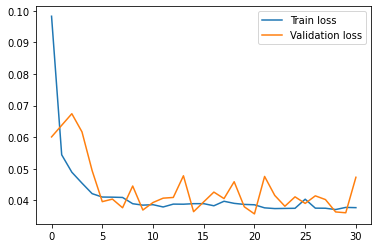

In [646]:
plot(lstm_history.history['loss'], label='Train loss')
plot(lstm_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [647]:
loss = model_lstm.evaluate(X_val, Y_val, verbose=0)
print('MAE: %f' % loss)

MAE: 0.035698


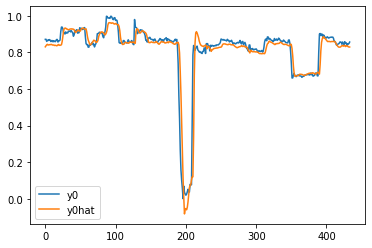

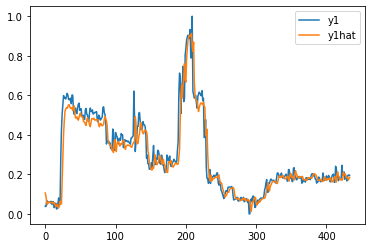

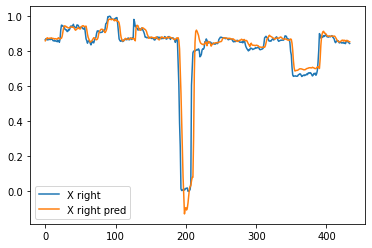

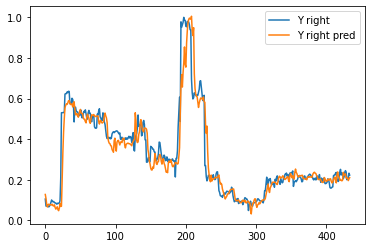

In [648]:
#X left  axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,0], label='y0')
plt.plot(yhat[:,0], label='y0hat')
plt.legend()
plt.show()

#Y left axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,1], label='y1')
plt.plot(yhat[:,1], label='y1hat')
plt.legend()
plt.show()

#X right axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,2], label='X right')
plt.plot(yhat[:,2], label='X right pred')
plt.legend()
plt.show()

#Y right axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,3], label='Y right')
plt.plot(yhat[:,3], label='Y right pred')
plt.legend()
plt.show()



In [660]:
Timeline2 = df.loc[(df['Participant name']==2) | (df['Participant name'] ==3) | (df['Participant name'] ==6)| (df['Participant name'] ==7)]

In [661]:
Timeline2 =Timeline2.iloc[:,4:]
Timeline2.shape

(5266, 4)

In [662]:
Timeline2=np.array(Timeline2)

In [667]:
x_data_np,y_data_np= datacreation(Timeline2)
x_data,y_data = dataengineering(x_data_np,y_data_np)
X_train,X_val,Y_train,Y_val = test_train_split(x_data,y_data) 
model_lstm = get_model2(X_train,Y_train)
lstm_history = model_lstm.fit(X_train, Y_train, validation_data=(X_val, Y_val),
epochs=50, verbose=2,batch_size = 16,
callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)])

x_data_np (5250, 15, 4) y_data_np (5250, 4)
y_data (5250, 4) x_data (5250, 15, 4)
0.0
0.0
1.0000000000000002
1.0000000000000002
0.0
0.0
0.9999999999999999
1.0
Train set shape (4200, 15, 4)
Validation set shape (1050, 15, 4)
y_train set shape (4200, 4)
Validation label shape (1050, 4)
Epoch 1/50
263/263 - 4s - loss: 0.0674 - val_loss: 0.0276 - 4s/epoch - 16ms/step
Epoch 2/50
263/263 - 2s - loss: 0.0377 - val_loss: 0.0238 - 2s/epoch - 8ms/step
Epoch 3/50
263/263 - 2s - loss: 0.0342 - val_loss: 0.0226 - 2s/epoch - 8ms/step
Epoch 4/50
263/263 - 2s - loss: 0.0318 - val_loss: 0.0256 - 2s/epoch - 8ms/step
Epoch 5/50
263/263 - 2s - loss: 0.0317 - val_loss: 0.0254 - 2s/epoch - 8ms/step
Epoch 6/50
263/263 - 2s - loss: 0.0311 - val_loss: 0.0266 - 2s/epoch - 8ms/step
Epoch 7/50
263/263 - 2s - loss: 0.0301 - val_loss: 0.0219 - 2s/epoch - 8ms/step
Epoch 8/50
263/263 - 2s - loss: 0.0310 - val_loss: 0.0238 - 2s/epoch - 8ms/step
Epoch 9/50
263/263 - 2s - loss: 0.0303 - val_loss: 0.0259 - 2s/epoch - 8ms

In [668]:
loss = model_lstm.evaluate(X_val, Y_val, verbose=0)
print('MAE: %f' % loss)


MAE: 0.018755


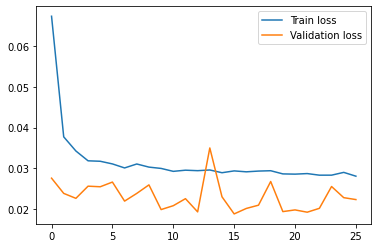

In [671]:
plot(lstm_history.history['loss'], label='Train loss')
plot(lstm_history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

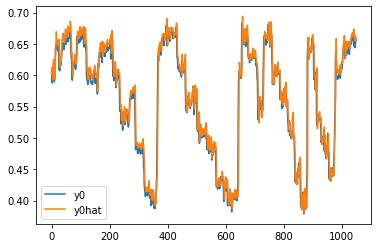

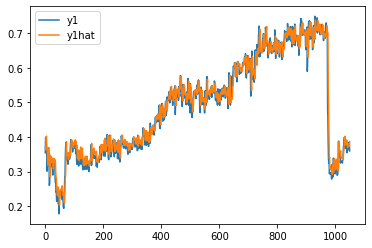

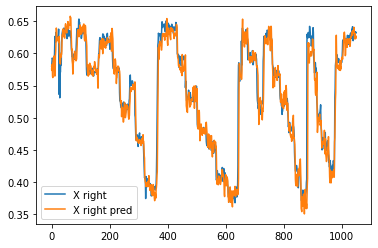

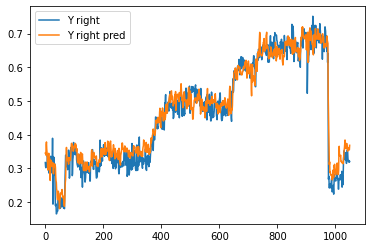

In [672]:
#X left  axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,0], label='y0')
plt.plot(yhat[:,0], label='y0hat')
plt.legend()
plt.show()

#Y left axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,1], label='y1')
plt.plot(yhat[:,1], label='y1hat')
plt.legend()
plt.show()

#X right axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,2], label='X right')
plt.plot(yhat[:,2], label='X right pred')
plt.legend()
plt.show()

#Y right axis value prediction
yhat = model_lstm.predict(X_val, verbose=0)
plt.plot(Y_val[:,3], label='Y right')
plt.plot(yhat[:,3], label='Y right pred')
plt.legend()
plt.show()
